In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_cleaned = pd.read_csv("/content/household_power_consumption.txt",sep=';')
print(df_cleaned.head())

<ipython-input-3-e65ccb346728>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv("/content/household_power_consumption.txt",sep=';')


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [ ]:
# Feature creation from datetime
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Date'] + ' ' + df_cleaned['Time'], dayfirst=True)

df_cleaned['hour'] = df_cleaned['Datetime'].dt.hour
df_cleaned['day_of_week'] = df_cleaned['Datetime'].dt.dayofweek
df_cleaned['is_weekend'] = df_cleaned['day_of_week'].isin([5, 6]).astype(int)
df_cleaned['month'] = df_cleaned['Datetime'].dt.month

In [ ]:
# Rolling average power over past 60 minutes
df_cleaned['Global_active_power'] = pd.to_numeric(df_cleaned['Global_active_power'], errors='coerce')


df_cleaned['rolling_avg_power_1hr'] = df_cleaned['Global_active_power'].rolling(window=60, min_periods=1).mean()

In [ ]:
#Preview the result
print(df_cleaned[['Datetime', 'Global_active_power', 'hour', 'day_of_week', 'is_weekend', 'month', 'rolling_avg_power_1hr']].head())

             Datetime  Global_active_power  hour  day_of_week  is_weekend  \
0 2006-12-16 17:24:00                4.216    17            5           1   
1 2006-12-16 17:25:00                5.360    17            5           1   
2 2006-12-16 17:26:00                5.374    17            5           1   
3 2006-12-16 17:27:00                5.388    17            5           1   
4 2006-12-16 17:28:00                3.666    17            5           1   

   month  rolling_avg_power_1hr  
0     12               4.216000  
1     12               4.788000  
2     12               4.983333  
3     12               5.084500  
4     12               4.800800  


In [ ]:
# Define features and target
features = ['hour', 'day_of_week', 'is_weekend', 'month', 'rolling_avg_power_1hr',
            'Global_reactive_power', 'Voltage', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
target = 'Global_active_power'

X = df_cleaned[features]
y = df_cleaned[target]



In [ ]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, random_state=42)
}



In [ ]:
print(X_train.dtypes)
print(X_train.head())
print(y_train.head())


hour                       int32
day_of_week                int32
is_weekend                 int64
month                      int32
rolling_avg_power_1hr    float64
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object
         hour  day_of_week  is_weekend  month  rolling_avg_power_1hr  \
1347712    15            3           0      7               0.317000   
378408     12            2           0      9               0.229067   
280143      6            4           0      6               0.183100   
670820     13            2           0      3               0.782767   
1940013    22            1           0      8               0.688133   

        Global_reactive_power  Voltage Global_intensity Sub_metering_1  \
1347712                 0.000  244.740            0.800          0.000   
378408                  0.000  240.600    

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1660207, 11)
(1660207,)


In [ ]:
# Concatenate features and labels temporarily
train_data = pd.concat([X_train, y_train], axis=1)
train_data = train_data.dropna()

# Split them back
X_train = train_data.drop(columns=y_train.name)
y_train = train_data[y_train.name]

# Do the same for test set if needed
test_data = pd.concat([X_test, y_test], axis=1)
test_data = test_data.dropna()
X_test = test_data.drop(columns=y_test.name)
y_test = test_data[y_test.name]




In [ ]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"--- {name} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print()



--- Linear Regression ---
RMSE: 0.0403
MAE: 0.0257
R² Score: 0.9985

--- Random Forest ---
RMSE: 0.0266
MAE: 0.0128
R² Score: 0.9994

--- Gradient Boosting ---
RMSE: 0.3839
MAE: 0.2898
R² Score: 0.8683



In [ ]:
# Predict with Random Forest
rf_model = models['Random Forest']
y_pred = rf_model.predict(X_test)

print(y_pred)

[0.2576 0.4686 0.7546 ... 0.3174 0.2686 0.1818]


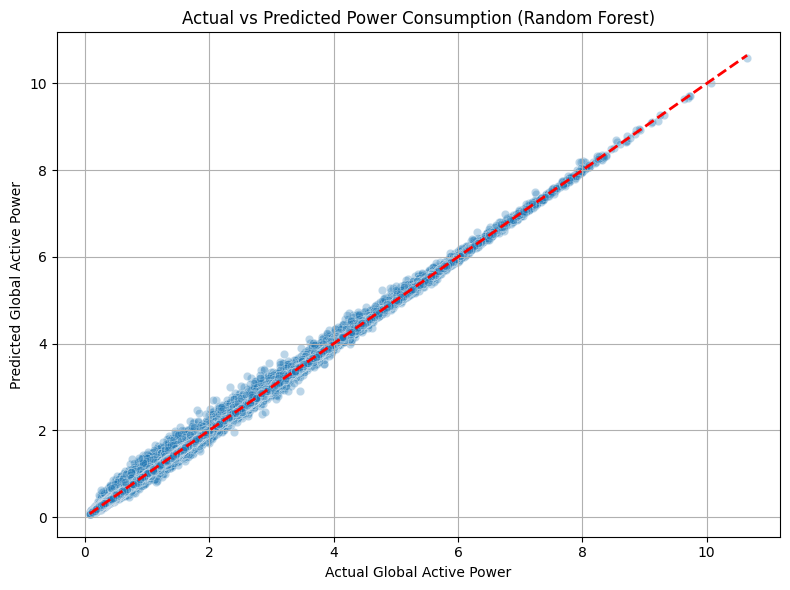

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.title('Actual vs Predicted Power Consumption (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()